In [3]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('mydrive')

Mounted at mydrive


# <font color = "red"> Comparison of Means </font>

## <font color = "Blue"> Test Scores </font>

**Let's import the `hsb2.txt` dataset. It contains 200 observations which were randomly sampled from the High School and Beyond survey. The same students took a reading and writing exam and their scores can be found in the table. We want to see if there is a significant difference between these scores. Then**

 * **First let's make the boxplot for both variables toqether in order to compare the distributions**
 * **Second test for a 1% of SL if there is any difference between the scores both exams**
 * **Find the 99% CI and interpret it together with the previous test**
 


In [5]:
scores = pd.read_csv('/content/mydrive/My Drive/Statistics and Data Analysis - 2019/Data Sets/hsb2.txt', sep = '\t')
scores.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


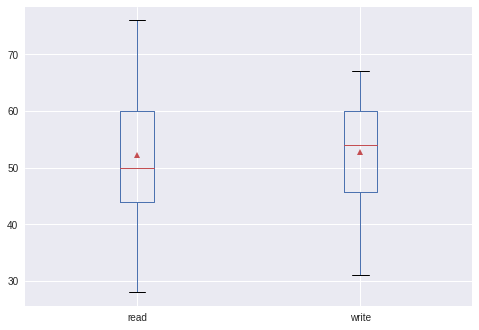

In [6]:
scores[['read', 'write']].boxplot(showmeans = True)
plt.show()

The scores are from the exams of the same students (in each row), then we have **dependent** samples. Let's find the **difference** variable

In [7]:
scores['diff'] = scores['read'] - scores['write']
scores.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst,diff
0,70,male,white,low,public,general,57,52,41,47,57,5
1,121,female,white,middle,public,vocational,68,59,53,63,61,9
2,86,male,white,high,public,general,44,33,54,58,31,11
3,141,male,white,high,public,vocational,63,44,47,53,56,19
4,172,male,white,middle,public,academic,47,52,57,53,61,-5


Let's use `statsmodels` to perform the t-test. The decision scheme for this case is

\begin{equation}
H_0:\{\bar D = 0\},\quad H_1:\{\bar D \neq 0\}
\end{equation}

then

In [8]:
SL = 0.01

des = smw.DescrStatsW(scores['diff'])
tstat, pval, dof = des.ttest_mean(value = 0, alternative = 'two-sided')

if pval < SL:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nRject H0'.format(tstat, pval, SL))
else:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nFail to Rject H0'.format(tstat, pval, SL))

tStat: -0.867
pval: 0.387
alpha: 0.010

Fail to Rject H0


Since we do not find evidence against the NULL hypothesis, for a 1% of significance level, we do not find any significant difference in the average scores of both exams

In [9]:
lower, upper = des.tconfint_mean(SL)
print('The {:2.0%} CI for the average difference of scores is [{:4.3f}, {:4.3f}]'.format(1-SL, lower, upper))

The 99% CI for the average difference of scores is [-2.179, 1.089]


### Math-by-gender score

First let's find a descriptive stats of the variable `math` grouped by `gender`

In [10]:
scores.groupby('gender')['math'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,109.0,52.394495,9.151015,33.0,45.0,53.0,58.0,72.0
male,91.0,52.945055,9.664784,35.0,45.0,52.0,59.5,75.0


Now let's find the boxplots. We have different options

 * The easiest is using `pandas` directly

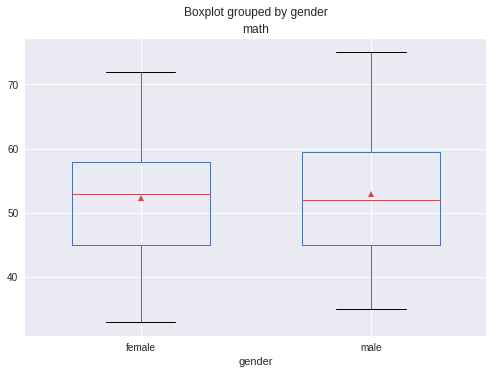

In [11]:
scores.boxplot(column = 'math', by = 'gender',
               showmeans = True,
               #patch_artist = True,
               widths = 0.6)
plt.show()

 * Another option is splitting the dataset using the conditional operators

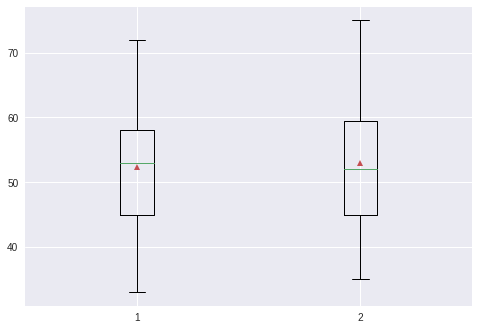

In [12]:
plt.boxplot([scores[scores['gender'] == 'female'].math,
             scores[scores['gender'] == 'male'].math],
            showmeans = True)
plt.show()

From the graphical analysis we may conclude that there is no significant difference betwween the population means.

Let's propose the following decision scheme

\begin{equation}
H_0:\{\mu_{\text{fem}}=\mu_{\text{males}}\},\quad H_0:\{\mu_{\text{fem}}\neq\mu_{\text{males}}\}
\end{equation}

To check analytically, we can use different methods:

 * Using the `scipy.stats` package:

In [13]:
SL = 0.05

tstat, pval = ss.ttest_ind(scores[scores['gender'] == 'female'].math, 
                           scores[scores['gender'] == 'male'].math,
                           equal_var = True)

if pval < SL:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nReject H0'.format(tstat, pval, SL))
else:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nFail to Reject H0'.format(tstat, pval, SL))

tStat: -0.413
pval: 0.680
alpha: 0.050

Fail to Reject H0


From the test we do not find evidence against the null hypothesis and our conclusion is that for a 5%  of significance level, the math scores of maes and females is not significantly different

 * Using `statsmodels` in its simplest way

In [14]:
SL = 0.05

tstat, pval, dof = smw.ttest_ind(scores[scores['gender'] == 'female'].math, 
                                 scores[scores['gender'] == 'male'].math,
                                 usevar = 'pooled')

if pval < SL:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nReject H0'.format(tstat, pval, SL))
else:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nFail to Reject H0'.format(tstat, pval, SL))

tStat: -0.413
pval: 0.680
alpha: 0.050

Fail to Reject H0


As should be, we obtain the same result as before

 * Using `statsmodels` to find the CI and the hypothesis test

In [15]:
# First we split the data in the categories: males/females
math_fem = scores[scores['gender'] == 'female'].math
math_mal = scores[scores['gender'] == 'male'].math

# We find the Descriptive Stats for both sets
dfemales = smw.DescrStatsW(math_fem)
dmales = smw.DescrStatsW(math_mal)

# We find the result of the comparison of the means of both populations
res = smw.CompareMeans(dfemales, dmales)

# Now we find the CI and/or the test from this result
lower, upper = res.tconfint_diff(SL)
tstat, pval, dof = res.ttest_ind(usevar = 'pooled')

# Perform the Test
if pval < SL:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nReject H0'.format(tstat, pval, SL))
else:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.3f}\n\nFail to Reject H0'.format(tstat, pval, SL))

# Print the CI
print('\nThe {:2.0%} CI for the difference in the marh scores is [{:4.3f}, {:4.3f}]'.format(1-SL, lower, upper))

tStat: -0.413
pval: 0.680
alpha: 0.050

Fail to Reject H0

The 95% CI for the difference in the marh scores is [-3.179, 2.078]


 * The last method is using directly the **formula**. Remember that this is the only possible approach if you are not given the whole dataset and you only have the values of the sample means, standard deviation and sizes. 
 
 We have to make a difference in two possible cases: if we are given or not the population variances and then, if not given, if we can assume then to be equal or not. If we can assume them to be equal we must compute the **pooled sample variance** (a sort o average of the sample variances), given by 

 \begin{equation}
S_p^2 = \frac{(n_x-1)s_x^2 + (n_y-1)s_y^2}{n_x+n_y-2}
 \end{equation}

 With this we can use the following formula for the confidence interval

 \begin{equation}
\mu_x-\mu_y\in\bar x-\bar y\pm t_{n_x+n_y-2,\alpha/2}S_p\sqrt{\frac{1}{n_x}+\frac{1}{n_y}}
 \end{equation}

In [16]:
# females data
fem_mean = math_fem.mean()
fem_std = math_fem.std()
fem_n = len(math_fem)

# males data
mal_mean = math_mal.mean()
mal_std = math_mal.std()
mal_n = len(math_mal)

# Pooled sample variance
sp_var = ((fem_n - 1)*fem_std**2 + (mal_n - 1)*mal_std**2)/(fem_n + mal_n - 2)

# t-value
tval = ss.t.isf(SL/2, fem_n + mal_n -2)

# Margin of Error
ME = tval * np.sqrt(sp_var/fem_n + sp_var/mal_n)

# The boundaries of the CI
diff = fem_mean - mal_mean

lower = diff - ME
upper = diff + ME

# Print the CI
print('\nThe {:2.0%} CI for the difference in the marh scores is [{:4.3f}, {:4.3f}]'.format(1-SL, lower, upper))


The 95% CI for the difference in the marh scores is [-3.179, 2.078]


In the same sense we may want to perform a test for this comparison of population means, then the **t-statistic** is

\begin{equation}
t_{n_x+n_y-2} = \frac{(\bar x - \bar y) - (\mu_x - \mu_y)}{s_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}}
\end{equation}

which reduces to 

\begin{equation}
t_{n_x+n_y-2} = \frac{(\bar x - \bar y)}{s_p\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}}
\end{equation}

under the NULL hypothesis $H_0:\{\mu_x = \mu_y\}$.

 * If we are not told that the variances can be assumed to be equal we must use the sample variances in each. In this case what changes are the **degrees of freedom**. We will not use the exact formula for this computation, but use an approximation:

 \begin{equation}
\nu = \min\left( n_x, n_y\right) -1 
 \end{equation}

 in this case the confidence interval is found using

  \begin{equation}
\mu_x-\mu_y\in\bar x-\bar y\pm t_{\nu,\alpha/2}\sqrt{\frac{s_x^2}{n_x}+\frac{s_y^2}{n_y}}
 \end{equation}

 in our case this is (we make the next cell code fully consistent even if there are quantities that we have found before)


In [17]:
# females data
fem_mean = math_fem.mean()
fem_std = math_fem.std()
fem_n = len(math_fem)

# males data
mal_mean = math_mal.mean()
mal_std = math_mal.std()
mal_n = len(math_mal)

# Pooled sample variance
dof = min(fem_n, mal_n) -1

# t-value
tval = ss.t.isf(SL/2, dof)

# Margin of Error
ME = tval * np.sqrt(fem_std**2/fem_n + mal_std**2/mal_n)

# The boundaries of the CI
diff = fem_mean - mal_mean

lower = diff - ME
upper = diff + ME

# Print the CI
print('\nThe {:2.0%} CI for the difference in the math scores is [{:4.3f}, {:4.3f}]'.format(1-SL, lower, upper))


The 95% CI for the difference in the math scores is [-3.212, 2.111]


not that there is not a huge difference with respect to the previous result, but in cases in which the test needs high precision, this difference can be crucial.

# <font color = "red"> Comparison of Proportions </font>

## <font color = "Blue"> Environment </font>

**The dataset `environment` contains data from a questionnaire to IE Students and EU general citizens on their opinion about their concern on the possible complete melting of the northern ice cap. The opinion is classified according to a categorical variable. Then**

 * **Load the dataset and find out the different categories in the `opinion` variable**
 * **Find if there is a significant difference in the proportion of people in each group who answered "a great deal" is different. For this use three different apporaches:**
  * **First make a bar plot to have a first insight on the possible answer**
  * **Find the 95% confidence interval**
  * **Perform a 5% test**

Let's load the dataset

In [18]:
environment = pd.read_csv('/content/mydrive/My Drive/Statistics and Data Analysis - 2019/Data Sets/environment.csv')
environment.head()

,opinion,affiliation
0,a great deal,EU
1,a great deal,EU
2,a great deal,EU
3,a great deal,EU
4,a great deal,EU


Let's first find the different categories

In [19]:
environment['opinion'].unique()

array(['a great deal', 'some', 'a little', 'not at all'], dtype=object)

Now, before performing the test, let's understand the dataset we have. For this, let's first describe it with respect to the `opinion`

In [20]:
environment.groupby('opinion').describe()

affiliation                
                   count unique top freq
opinion                                 
a great deal         523      2  EU  454
a little              56      2  EU   52
not at all            52      2  EU   50
some                 154      2  EU  124

See that 523 people answerd `a great deal` and 454 of them were EU citizens. Since we do not know the different sample sizes this is still somewhat irrelevant.

To see the different frequencies and the sample size, we can use the following

In [21]:
table = environment.groupby(['opinion', 'affiliation']).size().unstack()
table

affiliation,EU,IE
opinion,,
a great deal,454,69
a little,52,4
not at all,50,2
some,124,30


The previous table is written using **total frequencies**, but to compare the populations we need the relative frequencies, then let's do

In [22]:
proportions = pd.DataFrame({'EU': table['EU']/table['EU'].sum(),
                            'IE': table['IE']/table['IE'].sum()})
proportions

,EU,IE
opinion,,
a great deal,0.667647,0.657143
a little,0.076471,0.038095
not at all,0.073529,0.019048
some,0.182353,0.285714


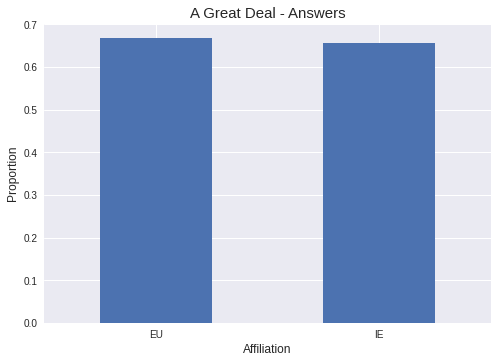

In [23]:
proportions.loc['a great deal'].plot(kind = 'bar')
plt.xlabel('Affiliation', fontsize = 12)
plt.ylabel('Proportion', fontsize = 12)
plt.title('A Great Deal - Answers', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

The confidence interval for the comparison of two population proportions depends on whether or not we can use the normal approximation of each population, i.e. if both $np$ and $nq$ are greater than 10.

Let's find the different quantities we need

In [24]:
# IE Students
n_IE = table['IE'].sum()
p_IE = proportions.loc['a great deal', 'IE']
q_IE = 1 - p_IE

# EU Citizens
n_EU = table['EU'].sum()
p_EU = proportions.loc['a great deal', 'EU']
q_EU = 1 - p_EU

now we can perform the check. First for the IE Students

In [25]:
if n_IE * p_IE > 10:
  if n_IE * q_IE > 10:
    print('The IE population CAN be approximated to a normal distribution')
else:
  print('The IE population CANNOT be approximated to a normal distribution')

The IE population CAN be approximated to a normal distribution


and now for the EU Citizens

In [26]:
if n_EU * p_EU > 10:
  if n_EU * q_EU > 10:
    print('The EU population CAN be approximated to a normal distribution')
else:
  print('The EU population CANNOT be approximated to a normal distribution')

The EU population CAN be approximated to a normal distribution


Since both populations can be approximated with a normal distribution, we can use the following formula

\begin{equation}
P_{EU} - P_{IE} \in \hat p_{EU}-\hat p_{IE}\pm z_{\alpha/2}\sqrt{\frac{\hat p_{EU}(1-\hat p_{EU})}{n_{EU}}+\frac{\hat p_{IE}(1-\hat p_{IE})}{n_{IE}}}
\end{equation}

then, in our case this is

In [27]:
# Sample Difference
diff = p_EU - p_IE

# Margin of Error
CL = 0.95
SL = 1-CL
t_val = ss.norm.isf(SL/2)
ME = t_val * np.sqrt(p_EU * (1-p_EU)/n_EU + p_IE * (1-p_IE)/n_IE)

# Boundaries
lower = diff - ME
upper = diff + ME

# CI
print('The {:2.0%} CI for the difference of population proportions is [{:4.3f}, {:4.3f}]'.format(CL, lower, upper))

The 95% CI for the difference of population proportions is [-0.087, 0.108]


The interpretation of this confidence interval is the usual: since the interval contains the value 0, we are 95% confident that there is no significant difference between the proportion of IE Students and EU Citizens that consider the melting of northern ice caps as `a great deal`.

 To perform the test we consider the following decision scheme

 \begin{equation}
H_0:\{P_{EU} = P_{IE}\},\quad H_1:\{P_{EU} \neq P_{IE}\}
 \end{equation}

 now, under this hypothesis we can assumet that the population proportions are equal and then find a **pooled sample proportion** which is defined as the following ratio

 \begin{equation}
\hat p = \frac{x_1 + x_2}{n_1 + n_2}
 \end{equation}

 where $x_i$ are the total frequencies  and $n_i$ are the sample sizes of each category (the next cell code is again self contained)

In [28]:
# IE Students
n_IE = table['IE'].sum()
x_IE = table.loc['a great deal', 'IE']

# EU Citizens
n_EU = table['EU'].sum()
x_EU = table.loc['a great deal', 'EU']

# Pooled sample proportion
phat = (x_IE + x_EU)/(n_IE + n_EU)

print('The pooled sample proportion is {:5.4f}'.format(phat))

The pooled sample proportion is 0.6662


Now we find the z-statistic as

\begin{equation}
\frac{\hat p_{EU} - \hat p_{IE}}{\sqrt{\hat p(1-\hat p)\left(\frac{1}{n_{IE}}+\frac{1}{n_{EU}}\right)}}
\end{equation}

In [29]:
# we use the difference in sample proportions that we have found above, then
z_stat = diff/np.sqrt(phat*(1-phat)*(1/n_IE + 1/n_EU))
pval = 2 * ss.norm.sf(z_stat)

# Perform the Test
if pval < SL:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.2f}\n\nReject H0'.format(z_stat, pval, SL))
else:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.2f}\n\nFail to Reject H0'.format(z_stat, pval, SL))

tStat: 0.212
pval: 0.832
alpha: 0.05

Fail to Reject H0


This result imply that, for a 5% of significance level, we do not find evidence from our sample in favor of the alternative hypothesis and then we conclude that we do not find a significant difference between the proportion of IE Students and EU Citizens which answered `a great deal`.

Note that this is an approximation and we could safely use the individual sample proportions in the formula. This may be as follows

In [30]:
z_stat = diff/np.sqrt(p_IE * (1-p_IE)/n_IE + p_EU * (1-p_EU)/n_EU)
pval = 2 * ss.norm.sf(z_stat)

# Perform the Test
if pval < SL:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.2f}\n\nReject H0'.format(z_stat, pval, SL))
else:
  print('tStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.2f}\n\nFail to Reject H0'.format(z_stat, pval, SL))

tStat: 0.211
pval: 0.833
alpha: 0.05

Fail to Reject H0


see that the difference with the previous result is minimal (just in the third decimal of the p-value)

# <font color = "red"> Non-parametric Tests </font>

## <font color = "red"> Goodness of Fit </font>

### <font color = "blue"> Jurors </font>

**A simple random sample of 275 jurors in a small county identifies the members by their racial groups. We would like to determine if jurors are racially representative of the population. The data is summarised in the following table**

| |	White |	Black |	Hispanic |	Other |
|---|----|----|----|----|
| Jury | 205 | 26 | 25 | 19 |
| Voters | 0.72 | 0.07 | 0.12 | 0.09 |

**The decision scheme is**

\begin{equation}
H_0: \{\text{The jurors are a random sample, i.e., there is no racial bias}\}
\end{equation}

\begin{equation}
H_1: \{\text{The jurors are not randomly sampled, i.e., there is racial bias}\}
\end{equation}

**Test it for a 5%**

Let's define the data

In [31]:
observed = np.array([205, 26, 25, 19])
probs = np.array([0.72, 0.07, 0.12, 0.09])

now we have to find the expected frequencies

In [32]:
N = observed.sum()
expected = np.round(probs*N)
expected

array([198.,  19.,  33.,  25.])

With this we can directly find the $\chi^2$ distribution as

\begin{equation}
\chi^2 = \sum\frac{(\text{observed}−\text{expected})^2}{\text{expected}} =  \frac{(205−198)^2}{198}+\frac{(26−19.25)^2}{19.25}+\frac{(25−33)^2}{33}+\frac{(19−24.75)^2}{24.75}
\end{equation}

In [33]:
# Chi Squared statistic
chiSq = sum((obs - exp)**2/exp for obs, exp in zip(observed, expected))

# p-value
pval = ss.chi2.sf(chiSq, len(observed)-1)

# Test
SL = 0.05
if pval < SL:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq, pval, SL))
else:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq, pval, SL))

chiSq = 6.206
p-value = 0.1020
alpha = 0.05

Fail to Reject H0


Since we fail to reject, we do not have evidence against the jurors being taken as a random sample, i.e. we do not find evidence in favor of a racial bias in this county.

We may have used the `chisquared` function as

In [34]:
chiSq, pval = ss.chisquare(observed, expected)

# Test
SL = 0.05
if pval < SL:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq, pval, SL))
else:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq, pval, SL))


chiSq = 6.206
p-value = 0.1020
alpha = 0.05

Fail to Reject H0


which returns the same result as above

### <font color = "Blue"> Gambler </font>

**In order to check if a set of dice is fair, a gambler throws 3 dice in a succesion of 100 trials. He makes this experiment under the condition that his earnings are directly proportional to the number of sixes obtained in each trial. Then**

 * **If the dice are fair, what is the probability distribution that governs the outcome of each throw?**
 * **Test for a 1% if the dice can be assumed to be fair if the observed frequencies are**

<br>

| Number of successes | Observed Frequencies |
|:-----:|:-----:|
| 0 | 64 |
| 1 | 28 |
| 2 | 6  | 
| 3 | 2  | 

<br>

The probability distribution for this sequence is the binomial distribution

\begin{equation}
P(X=x) = \begin{pmatrix} 3 \\ x\end{pmatrix}\left(\frac{1}{6}\right)^x\left(\frac{5}{6}\right)^{3-x}
\end{equation}

Let's find the expected frequencies. For this we create a vector with the number of successes (from 0 to 3), find the corresponding binomical probabilities and then multiply times the number of trials

In [35]:
# number of successes
x = np.arange(0,4,1)

# number of trials
N = 100

# expected frequencies
expected = np.round([N*ss.binom.pmf(i, 3, 1/6) for i in x], 2)
expected

array([57.87, 34.72,  6.94,  0.46])

with this, the table above reads

<br>

| Number of successes | Observed | Expected |
|:-----:|:-----:|:-------:|
| 0 | 64 | 57.87 |
| 1 | 28 | 34.72 |
| 2 | 6  | 6.94  | 
| 3 | 2  | 0.46  |

<br>

Let's now test if there is a significant difference for a 1%. For this we compute the $\chi^2$ distribution

In [36]:
# observed
observed = np.array([64, 28, 6, 2])

# Chi Squared statistic
chiSq = sum((obs - exp)**2/exp for obs, exp in zip(observed, expected))

# p-value
pval = ss.chi2.sf(chiSq, len(observed)-1)

# Test
SL = 0.01
if pval < SL:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq, pval, SL))
else:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq, pval, SL))

chiSq = 7.233
p-value = 0.0648
alpha = 0.01

Fail to Reject H0


Since we fail to reject, we do not find evidence against the *fairness* of these dice, for a 1% of significance level

### <font color = "Blue"> Plum Roots </font>

**Hoblyn and Palmer reported in 1934 an experiment conducted on vegetative reproduction of root-stocks for plum trees ffrom cuttings taken from roots of older trees. The observed data is arranged in the following table**

<br>
<table>
<tr>
<th rowspan = 2> Ultimate condition of the cutting </th><th colspan = 2>Planted at Once</th><th colspan = 2>Planted in Spring</th>
</tr>
<tr>
<th> Short </th><th> Long </th><th> Short </th><th> Long </th>
</tr>
<tr>
<td>Alive</td><td>107</td><td>156</td><td>31</td><td>84</td>
</tr>
<tr>
<td>Dead</td><td>133</td><td>84</td><td>209</td><td>156</td>
</tr>
<tr>
<td>Total</td><td>240</td><td>240</td><td>240</td><td>240</td>
</tr>
</table>
<br>

**now consider only the trees which were alive. Then find the expected proportions in each group and then find if, for a 5%, there is evidence that the values do not follow the expected distribution. After that consider grouping with respect to *Planted at Once* and *Planted in Spring* and test if there is a significant difference bewteen these two groups for a 1% of significance level**



Remember that the expected values are basically 

\begin{equation}
\frac{n_i}{N}\sum_i x_i = \frac{\text{row total}\cdot\text{column total}}{N} = \hat p n_i
\end{equation}

In this case we can find the pooled sample proportion since, under the null hypothesis, there is no difference, then


In [37]:
Alive = np.array([107, 156, 31, 84])
Total = np.array([240, 240, 240, 240])

# Total Sample Size
N = Total.sum()

# Pooled Sample Proportion
phat = Alive.sum()/N
phat

0.39375

Then we can now find the expected values as

In [38]:
Expected = Total*phat
Expected

array([94.5, 94.5, 94.5, 94.5])

note that these expected values can also be found without computing the pooled sample proportion following directly the formula

In [39]:
Expected = [Alive.sum()*n/N for n in Total]
Expected

[94.5, 94.5, 94.5, 94.5]

Now we can find the $\chi^2$ statistic as 

\begin{equation}
\chi^2 = \sum_i\frac{(\text{observed}_i - \text{expected}_i)^2}{\text{expected}_i}
\end{equation}

this is

\begin{equation}
\chi^2 = \frac{(107 - 94.5)^2}{94.5}+\frac{(156 - 94.5)^2}{94.5}+\frac{(31 - 94.5)^2}{94.5}+\frac{(84 - 94.5)^2}{94.5}
\end{equation}

In [40]:
chi_sq_stat = sum([(obs - exp)**2/exp for obs, exp in zip(Alive, Expected)])
chi_sq_stat

85.51322751322752

we can do this better with the `chisquare` function of the `scipy.stats` package, then

In [41]:
SL = 0.05
chiSq, pval = ss.chisquare(Alive, Expected)

if pval < SL:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq, pval, SL))
else:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq, pval, SL))

chiSq = 85.513
p-value = 0.0000
alpha = 0.05

Reject H0


Since we reject the NULL hypothesis, we find evidence to say that the data does not follow the expected distribution, and there are significant differences bewteen the different groups, i.e. the groups are not homogeneous.

### <font color = "Blue"> Airport </font>

**An airport is performing a study to find out if they have to upgrade their facilities. Their first step is trying to find a probability distribution of the number of planes arriving each 10 minutes. The have gathered the data you can see then the following table**

| Number of Planes | Frequency |
|:------:|:-----:|
| 0 | 1  | 
| 1 | 6  | 
| 2 | 12 | 
| 3 | 15 |
| 4 | 10 | 
| 5 | 5  |
| 6 | 2  |
| ≥7| 0  |

**Then:**

 * **Determine which probability distribution they should use to modelize this case**
 * **Find the expected frequencies from this model**
 * **Test for a 5% if the model is a good description of this situation**

This is a case where we have number of events per time interval, so we should try to describe it using a Poisson distribution

\begin{equation}
P(X=x) = e^{-\lambda}\frac{\lambda^x}{x!}
\end{equation}

then we should the value of $\lambda$ from the table and then perform a **goodness of fit** test.

Remember that the average in a frequency distribution is

\begin{equation}
\bar x = \frac{1}{n}\sum_i n_i\cdot x_i = \frac{0\cdot 1 + 1 \cdot 6+\dots 7\cdot 0}{1 +6 + 12+ \dots + 0}
\end{equation}

In [42]:
# Sample information
planes = np.arange(0, 8, 1)
observed = np.array([1, 6, 12, 15, 10, 5 , 2, 0])

# Find the average
n = observed.sum()
aver = sum((planes * observed)/n)

print('The value of lambda is', aver)

# Poisson distribution
distr = ss.poisson(aver)

The value of lambda is 2.980392156862745


Now with this distribution we can find the expected frequencies using

\begin{equation}
n_i = n\cdot P(X=x_i)
\end{equation}

In [43]:
expected = np.round([n * distr.pmf(i) for i in planes],2)
expected

array([ 2.59,  7.72, 11.5 , 11.43,  8.51,  5.07,  2.52,  1.07])

Once we have the expected frequencies we can use the $\chi^2$-test for the goodness of fit. Note that the decisison scheme is

\begin{equation}
H_0:\{\text{Data fits to a Poisson}\},\quad H_a:\{\text{Data does not fit to a Poisson}\}
\end{equation}

so, let's find the p-value and perform the test

In [44]:
# Test values
chiSq, pval = ss.chisquare(observed, expected)
SL = 0.05

# Test 
if pval < SL:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq, pval, SL))
else:
  print('chiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq, pval, SL))

chiSq = 3.935
p-value = 0.7872
alpha = 0.05

Fail to Reject H0


The conclussion is that, since we fail to reject the NULL, there is no evidence from the sample against it. Therefore we conclude that for a 5% of significance level, the data can acatually be described using a Poisson distribution.

## <font color = "red"> Independency </font>

### <font color = "Blue"> Vaccines </font>

**A vaccine was designed to eliminate a particular strain of the virus, called “MN strain”. Seven AIDS patients where treated with a vaccine, while 31 AIDS patients were treated with a placebo. The table shows the number of patients who tested positive for the MN strain in the follow-up period.**

<br>

| Patient Group | Positive | Negative | Totals |
|-----------------------|---------------|----------------| -----------|
|Unvaccinated | 22 | 9 | 31 |
|Vaccinated | 2 | 5 | 7 |
|Totals | 24 | 14 | 38 |

<br>

1. **Conduct a test to determine whether the vaccine is effective in treating the MN strain of HIV. Use $\alpha = 0.05$.**
2. **Are the assumptions for the test respected? What are the implications?**
3. **What is _rejecting the null hypothesis_ implying?**

Let's write the table of the observed frequencies

In [45]:
observed = pd.DataFrame({'positive': [22, 2],
                         'negative': [9, 5]},
                        index = ['Unvaccinated', 'Vaccinated'])
observed

,positive,negative
Unvaccinated,22,9
Vaccinated,2,5


Tests for Independence are characterized by:
- Two **categorical** variables 
- We want to know whether these two variables are related by _counting_ the number of ocurrences in each scenario
- We then compare _observed_ and _expected_ values, under the assumption that $H_0$ is true
>- $H_0$: The two variables are _independent_, i.e., treatment (vaccine) and condition (positive/negative) are not related
>- $H_a$: The two variables are _dependent_, i.e., treatment (vaccine) and condition (positive/negative) are related

Now, remember that the condition for independency is that

\begin{equation}
P(A\cap B)=P(A)\cdot P(B)
\end{equation}

where we use the totals probabilities, i.e. the marginal probabilities of the table. Let's first compute the values manually and then using `scipy.stats`


From the table we can form two events

\begin{equation}
\text{vaccinated}:\{\text{no}, \text{yes}\},\quad \text{test}:\{\text{positive}, \text{negative}\}
\end{equation}

and the frequencies are given in the marginal distributions of the table

In [46]:
vac = np.array([31, 7])
tes = np.array([24, 14])

let's turn these frequency distributions into probability distributions

In [47]:
# total sample size
N = vac.sum()

# probability distributions
vaccinated = vac/N
test = tes/N

# independent probabilities
independent = pd.DataFrame()
for i in vaccinated:
  for j in test:
    independent.loc[i,j] = np.round(i*j*N,2)

independent.columns = ['positive', 'negative']
independent['test'] = ['unvaccinated', 'vaccinated']
independent.set_index('test', drop = True, inplace = True)
independent

,positive,negative
test,,
unvaccinated,19.58,11.42
vaccinated,4.42,2.58


with this we have the expected frequencies. Now we can compute the $\chi^2$ statistic as follows

In [48]:
# (row, column) index
row = [0,1]
col = [0,1]

# Matrix elements
chiSq_mat = pd.DataFrame()
for i in row:
  for j in col:
    chiSq_mat.loc[i,j] = (observed.iloc[i,j] - independent.iloc[i,j])**2/independent.iloc[i,j]

# Chi-squared statistic
chiSq = sum(chiSq_mat.sum())

# p-value
pval = ss.chi2.sf(chiSq, len(observed)-1)

# Test
SL = 0.01
if pval < SL:
  print('chiSq = {:4.3f}\np-value = {:4.3f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq, pval, SL))
else:
  print('chiSq = {:4.3f}\np-value = {:4.3f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq, pval, SL))

chiSq = 4.407
p-value = 0.036
alpha = 0.01

Fail to Reject H0


Since we fail to reject the NULL hypothesis, this implies that we do not find evidence against independency, then treatment and condition are not related for a 1% (note that the conclusion is different if we may have chosen a 5%)

This computation may be done in a shorter way with the use of the `contingency table` in `scipy.stats`, let's see it

In [49]:
observed = [[22, 9], [2, 5]]
chiSq, pVal, dfreedom, expected = ss.chi2_contingency(observed, correction = False)

print("Expected Matrix :: ")
print(expected)

# Test
SL = 0.01
if pval < SL:
  print('\nchiSq = {:4.3f}\np-value = {:4.3f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq, pval, SL))
else:
  print('\nchiSq = {:4.3f}\np-value = {:4.3f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq, pval, SL))

Expected Matrix :: 
[[19.57894737 11.42105263]
 [ 4.42105263  2.57894737]]

chiSq = 4.411
p-value = 0.036
alpha = 0.01

Fail to Reject H0


the result is just numerically slightly different from our previous one because we have rounded the expected frequencies under the independency conclusion to only two decimal numbers.

### <font color = "Blue"> Hypoglycemic Attacks </font>

**Consider the study in the Introductory Slides of the course. There we considered a study for the development of a new diabetes medicine which may produce hypoglycemic attacks due to an excess of insulin in blood. There were 367 patients in the control group and 433 in the treatment group such that the number of hypoglycemic attacks after 30 and 90 days are found in the table below**

<br>
<table>
<tr>
<th rowspan = 2> Group </th><th colspan = 2>30 days</th><th colspan = 2>90 days</th>
</tr>
<tr>
<th> Positive </th><th> Negative </th><th> Positive </th><th> Negative </th>
</tr>
<tr>
<td>Control</td><td>125</td><td>242</td><td>221</td><td>146</td>
</tr>
<tr>
<td>Treatment</td><td>218</td><td>215</td><td>283</td><td>150</td>
</tr>
<tr>
<td>Total</td><td>354</td><td>446</td><td>457</td><td>343</td>
</tr>
</table>
<br>

**test for a 5% of significance level if there is any relation between the treatment and the attacks for both number of days (separatedly test before 30 days then 90 days)**

In [50]:
SL = 0.05

observed_30 = [[125, 242], [218, 215]]
observed_90 = [[221, 146], [283, 150]]

chiSq_30, pval_30, dof_30, expected_30 = ss.chi2_contingency(observed_30, correction = False)
chiSq_90, pval_90, dof_90, expected_90 = ss.chi2_contingency(observed_90, correction = False)

# 30 days test
print('Expected Values: ')
print(np.round(expected_30))

if pval_30 < SL:
  print('\nchiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nReject H0'.format(chiSq_30, pval_30, SL))
else:
  print('\nchiSq = {:4.3f}\np-value = {:4.4f}\nalpha = {:3.2f}\n\nFail to Reject H0'.format(chiSq_30, pval_30, SL))

Expected Values: 
[[157. 210.]
 [186. 247.]]

chiSq = 21.512
p-value = 0.0000
alpha = 0.05

Reject H0


### <font color = "Blue"> Titanic </font>

**Load the `Titanic` dataset and test for a 5% of significance level if the percentage of survivors is dependent of the class in which passengers were.**

Let's load the dataset

In [53]:
titanic = pd.read_csv('/content/mydrive/My Drive/IEXL - Bootcamp - Math&Stats 20-21 September/data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To generate the contingency table with the two categorical variables we do the following

In [54]:
freqs = titanic.groupby(['Pclass','Survived']).size().unstack()
freqs

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


These are the **observed** frequencies of the problem. With this table we can directly use the contingency table chi-squared test

In [55]:
SL = 0.05
chiSq, pval, dof, expected = ss.chi2_contingency(freqs, correction = False)

print('Expected Values: ')
print(np.round(expected))

if pval < SL:
  print('\np-value: {:4.3f}\nalpha: {:4.2f}\nWe Reject the NULL Hypothesis'.format(pval, SL))
else:
  print('\np-value: {:4.3f}\nalpha: {:4.2f}\nWe Fail to Reject the NULL Hypothesis'.format(pval, SL))


Expected Values: 
[[133.  83.]
 [113.  71.]
 [303. 188.]]

p-value: 0.000
alpha: 0.05
We Reject the NULL Hypothesis


Since we reject the null hypothesis, that means that the events "Survived" and "PClass" are not independent, i.e. the passenger's class affected the rate of survivals.

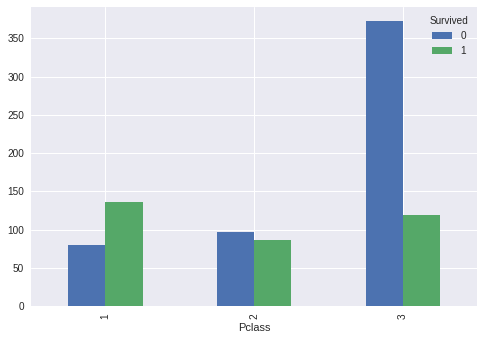

In [56]:
freqs.plot(kind = 'bar')
plt.show()